In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mendeleev as mdl
import csv
import os

from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times"],
    "text.usetex": True,
    "font.size": 8,
    "pgf.rcfonts": False
})
# rc('font',**{'family':'serif','serif':['Times']})
# rc('text', usetex=True)
# plt.rcParams.update({'font.size': 8})

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "pgf.preamble": "\n".join([
          r"\usepackage{mathtools}",
     ]),
})

from colors import load_colors

color_schemes = load_colors()
print(color_schemes)
c_list=color_schemes['c_complementary']

{'c_rainbow': ['#690000', '#C1292E', '#e08e45', '#E0BE36', '#7A8C2A', '#0D863D', '#2d82b7', '#740091'], 'c_complementary': ['#D90368', '#D4C200', '#2CDA9D', '#BA3B46', '#FA824C', '#3C91E6', '#009528', '#6689C6'], 'c_violetorange': ['#5E0ABF', '#701AA4', '#82298A', '#94396F', '#A64854', '#B85839', '#CA671F', '#DC7704']}


<>:21: SyntaxWarning: invalid escape sequence '\%'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\%'
<>:24: SyntaxWarning: invalid escape sequence '\m'
C:\Users\schum\AppData\Local\Temp\ipykernel_16724\2010207063.py:21: SyntaxWarning: invalid escape sequence '\%'
  label=f'{col_names[i]} $~|~ {round(deltaE[i-1],2)}\%$',
C:\Users\schum\AppData\Local\Temp\ipykernel_16724\2010207063.py:24: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('Kinetic energy $E_{\mathrm{proj}}^{\mathrm{scat}}$ in keV', fontsize=10)


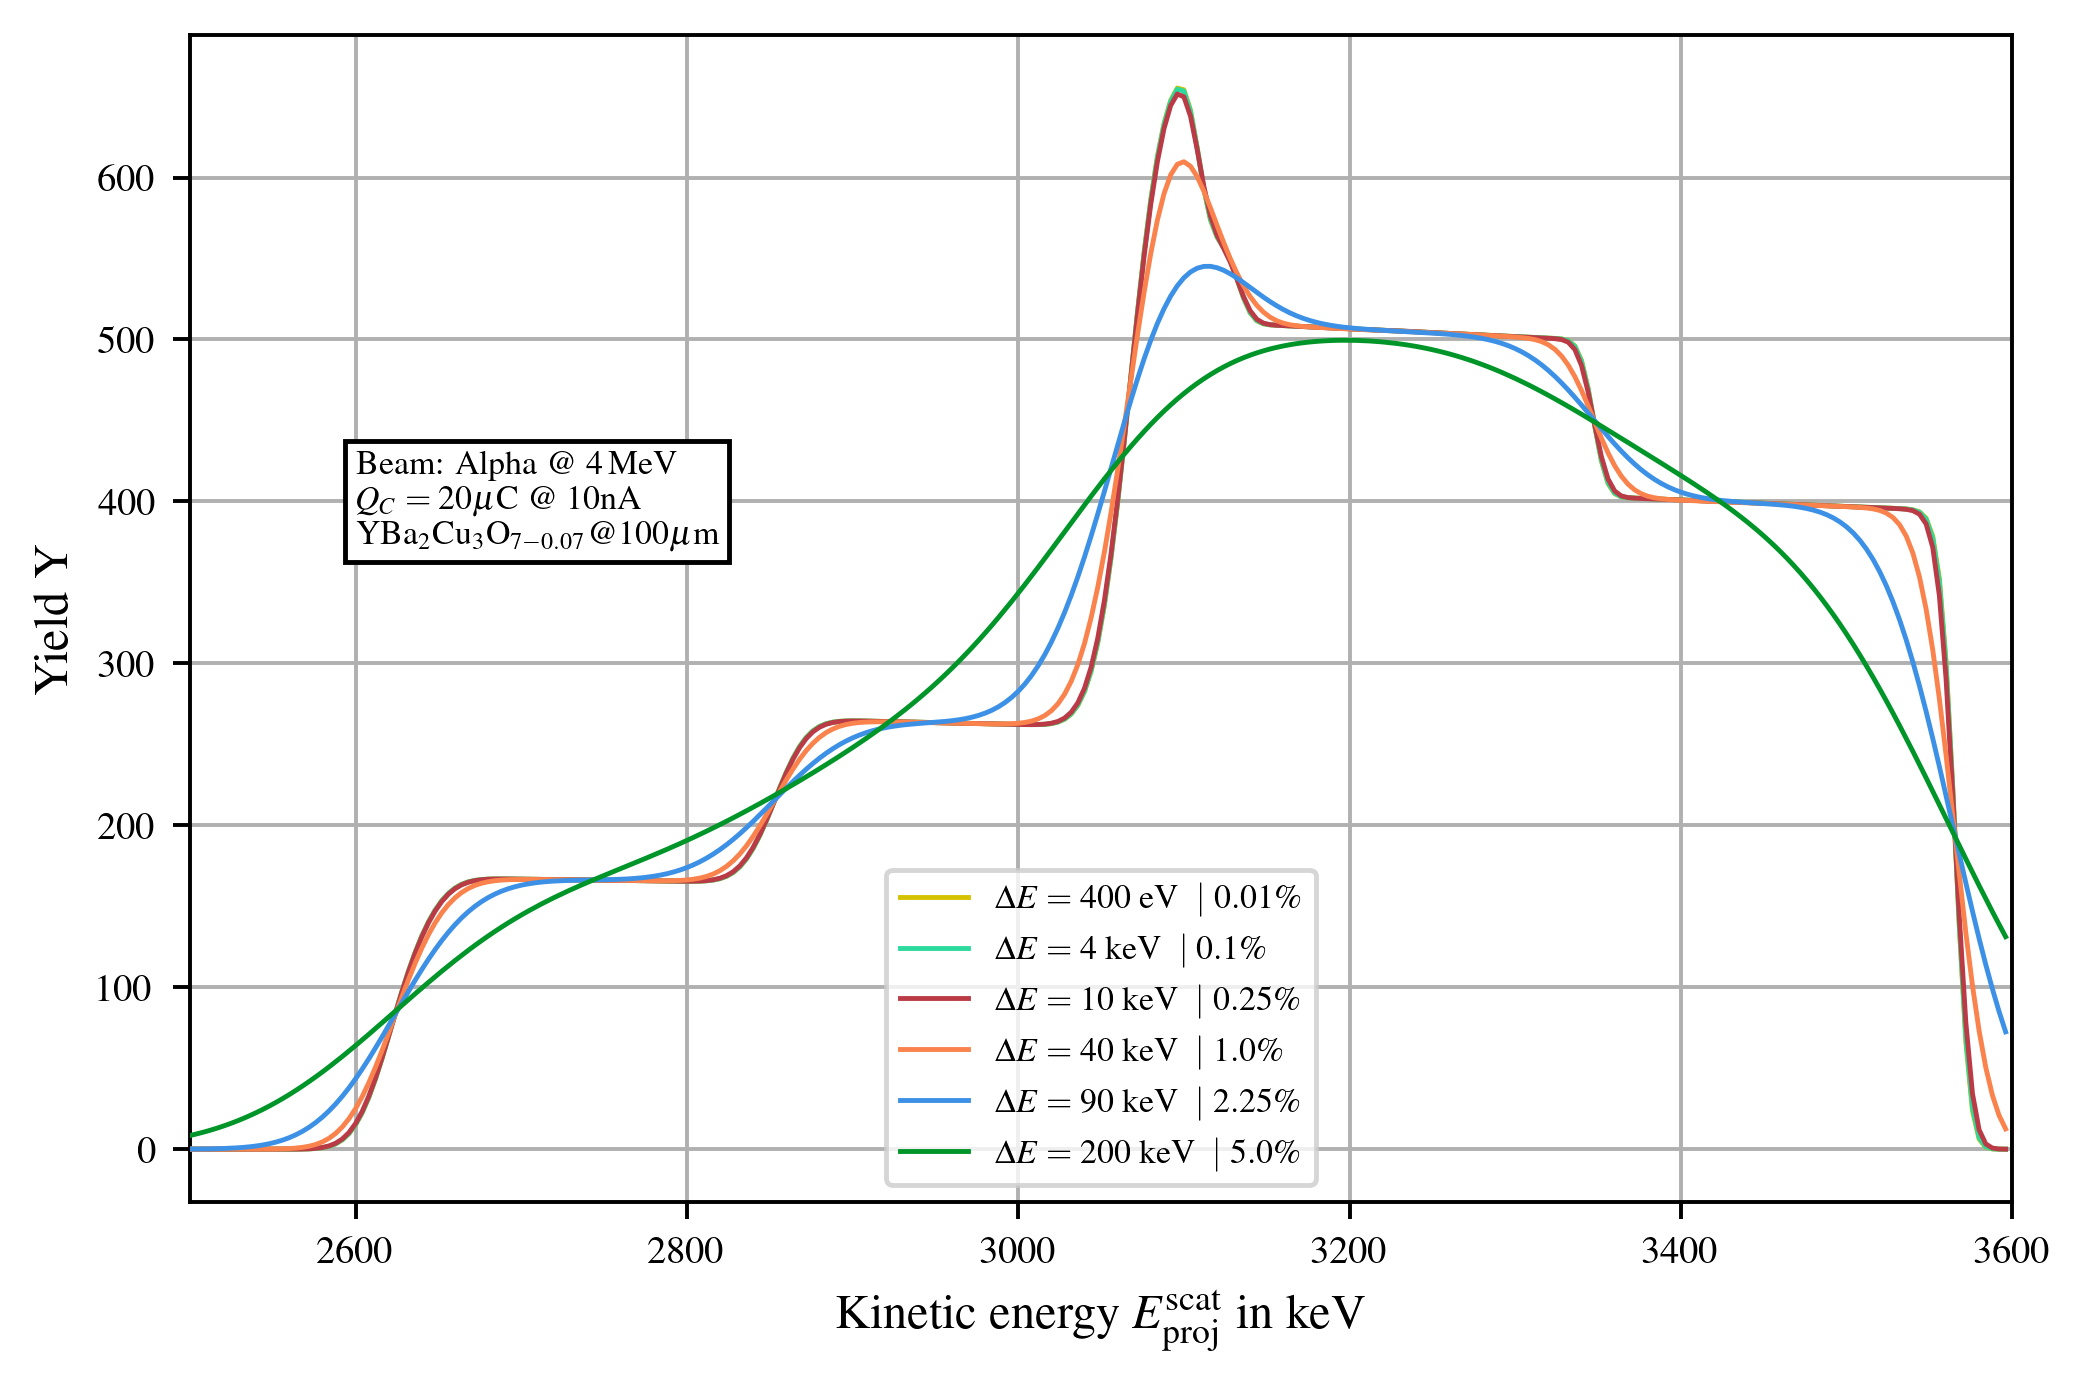

In [50]:
filename = "./compare.csv"
df = pd.read_csv(filename, delimiter=';',header=0)

epc = 4
col_names = list(df.columns)
channel_numbers = list(df['channel'])
channel_numbers.append(0)
channel_numbers.sort()
channel_numbers = np.array(channel_numbers)
energy_values = list(np.array(list(df['channel']))*epc)
energy_values.append(0)
energy_values.sort()

fig, ax = plt.subplots(figsize=(6,4),dpi=350)
plt.grid('True', zorder=1)
plt.xlim(2500,3600)
deltaE = [0.4/4000*100, 4/4000*100, 10/4000*100, 40/4000*100, 90/4000*100, 200/4000*100]
for i in range(1,len(col_names)):
    ax.plot(energy_values[1:],df[col_names[i]],
                    color=c_list[i], lw=1, ls='solid', alpha=1,
                    label=f'{col_names[i]} $~|~ {round(deltaE[i-1],2)}\%$',
                    zorder=3)

ax.set_xlabel('Kinetic energy $E_{\mathrm{proj}}^{\mathrm{scat}}$ in keV', fontsize=10)
ax.set_ylabel('Yield Y', fontsize=10)

    
ax.text(x=2600,y=400,s=r'Beam: Alpha @ 4\,MeV' + '\n' + r'$Q_C = 20\mu$C @ 10nA' + '\n' + r'$\mathrm{YBa}_2\mathrm{Cu}_3\mathrm{O}_{7-0.07} @ 100\mathrm{\mu m}$', fontsize=7, va='center', bbox=dict(boxstyle="square",ec=(0., 0., 0.),fc=(1., 1., 1.)))
ax.legend(fontsize=7, loc='lower center', ncols=1)
plt.tight_layout()
plt.savefig('YBCO_compare.pdf',transparent=False)